## Imports

In [1]:
import os, glob
os.chdir('..') 
PROJ_DIR = os.getcwd()
print(PROJ_DIR)
from collections import defaultdict
import pandas as pd
from IPython.display import HTML
import hate_datasets as dc
import kg_adaptation as kg_adapt
import identity_group_identification as model_training
from functions.helper import get_metrics, sample_error_partition, sample_true_partition

dnames = ['xtremespeech', 'gabhatecorpus', 'hatexplain']
# Evaluation variables
models_folder = os.path.join(PROJ_DIR, 'models')
error_entity_folder = os.path.join(PROJ_DIR, 'interpretations')

/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation
2023-03-30 13:49:22.395637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Train and export hybrid and transformer based models

In [ ]:
! bash notebooks/train_models.sh

In [2]:
# Reproduce experiments from experiment pickle file: cross-validation
exp_files = sorted(glob.glob(os.path.join(models_folder, '*/*/*/exp_file.pkl')))
print(f' Cross-validation: {len(exp_files)} models')

 found 6 models


In [2]:
# Import hybrid, transformers, lexical models: out-of-domain evaluation
# use with predict function
models = []
# ... lexical
lexicon_path = os.path.join(PROJ_DIR, 'baselines', 'Toxic_Debias', 'word_based_bias_list_pruned.csv')
models.append(model_training.toxic_debias_load(lexicon_path=lexicon_path))
hybrid_models = sorted(glob.glob(os.path.join(models_folder, 'hybrid/gso*/*hierarchical*')))
models += [model_training.model_load(hybrid_model) for hybrid_model in hybrid_models]
# models.append([])

print(f' Out-of-domain evaluation: {len(models)} models')

 Out-of-domain evaluation: 4 models


## Evaluation

Overall loss: 0.6635
Label loss: nan
Accuracy by chance: 1.2650
Log-odds difference: 0.5423
ROC AUC: 0.8640
PR AUC: 0.8574
F1-score: 0.5101
Precision: 0.8420
Recall: 0.4358
Overall loss: 0.4810
Label loss: nan
Accuracy by chance: 1.6195
Log-odds difference: 1.43
ROC AUC: 0.9014
PR AUC: 0.8958
F1-score: 0.7809
Precision: 0.8824
Recall: 0.7032


/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Overall loss: 0.3716
Label loss: nan
Accuracy by chance: 1.7325
Log-odds difference: 1.823
ROC AUC: 0.9251
PR AUC: 0.9270
F1-score: 0.8487
Precision: 0.8933
Recall: 0.8085
Overall loss: 0.6684
Label loss: nan
Accuracy by chance: 1.2214
Log-odds difference: 0.4481
ROC AUC: 0.8302
PR AUC: 0.8257
F1-score: 0.4960
Precision: 0.8118
Recall: 0.4371


/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Overall loss: 0.4836
Label loss: nan
Accuracy by chance: 1.5878
Log-odds difference: 1.335
ROC AUC: 0.8954
PR AUC: 0.8936
F1-score: 0.7585
Precision: 0.8784
Recall: 0.6700
Overall loss: 0.3682
Label loss: nan
Accuracy by chance: 1.7344
Log-odds difference: 1.831
ROC AUC: 0.9257
PR AUC: 0.9278
F1-score: 0.8502
Precision: 0.8914
Recall: 0.8127


/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/baselines/target_classification/hate_target/utils.py:82: RuntimeWarning: Mean of empty slice.
  print(f"Label loss: {label_loss.mean():0.4f}")
/Users/prl222/OneDrive - The Open University/Projects/hate-speech-identities/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


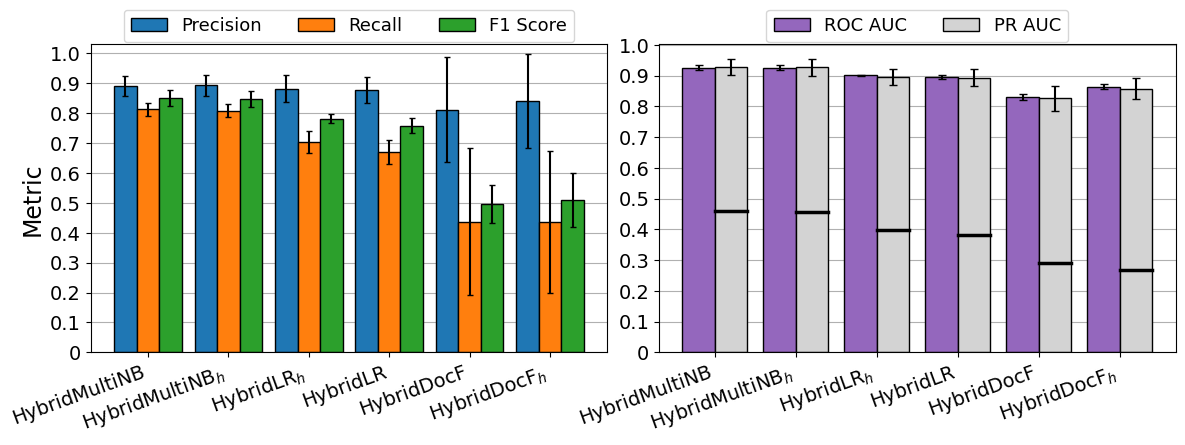

In [5]:
# 1. Cross-validation results: all with stem

model_names_cv = [r'HybridDocF$_{h}$', 
                  r'HybridLR$_{h}$', 
                  r'HybridMultiNB$_{h}$', 
                  r'HybridDocF', 
                  r'HybridLR', 
                  r'HybridMultiNB']#, r'RoBERTa$_{base}$']

model_training.plot_cv_from_exp_files(exp_files, 'target_gso', model_names_cv, models_folder)

In [3]:
# 2. Out-of-domain evaluation
model_names = ['Toxic_Debias', r'HybridDocF$_{h}$', r'HybridLR$_{h}$', r'HybridMultiNB$_{h}$', r'RoBERTa$_{base}$']
model_names = ['Toxic_Debias', r'HybridDocF$_{h}$', r'HybridLR$_{h}$', r'HybridMultiNB$_{h}$']

identity_col = 'target_gso'
performance, datasets = defaultdict(lambda: defaultdict(dict)), {}
for dname in ['gabhatecorpus', 'xtremespeech', 'hatexplain']:
    print(f'\n{dname.upper()}')
    df, text_col0, id_col0, identities_dict = dc.import_dataset(dname)
    data, target_cols, text_col, id_col = dc.prepare_for_model_evaluation(
        df, text_col0, id_col0, identities_dict
    )
    if dname == 'xtremespeech':
        # Include only texts in English
        data = data.loc[data['Language'] == 'English']
        print(f'... {data.shape[0]} english texts.')


    # use model_predict for hybrid and transformers, and lexical-based functions.
    for model_name, model in zip(model_names, models):
        print(model_name)
        if model_name == 'Toxic_Debias':
            y_trues = data[identity_col].values
            y_preds, matches = model_training.toxic_debias_predict(model, data, text_col)
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            data[f'{model_name}_y_trues'] = y_trues
            data[f'{model_name}_y_preds'] = y_preds
            data[f'{model_name}_matches'] = matches
        else:
            y_trues, y_preds, interpretations = model_training.model_predict(model, data, identity_col, text_col)
            y_preds_hard = y_preds >= 0.5
            metrics = {m: v[0] for m, v in get_metrics([y_trues], [y_preds_hard], [y_preds]).items()}
            performance[dname][model_name] =  metrics
            if model_name == r'HybridLR$_{h}$':
                # Save KG interpretations for best performing hybrid model
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
                interpration_cols = [f'{model_name}_{c}' for c in ['pos_matches', 'neg_matches', 'high_syns']]
                data[interpration_cols] = pd.DataFrame(interpretations).transpose()
            if model_name == r'RoBERTa$_{base}$':
                data[f'{model_name}_y_trues'] = y_trues
                data[f'{model_name}_y_preds'] = y_preds
    prediction_cols = data.columns[-7]
    datasets[dname] = data.copy()


GABHATECORPUS
gabhatecorpus imported successfully from data folder: 7813 annotations samples.
Toxic_Debias
HybridDocF$_{h}$
indexed 7813 documents
 38/977 [>.............................] - ETA: 1s  

2023-03-30 13:50:50.493876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 13:50:50.494277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]


977/977 [==============================] - 2s 1ms/step
 uni output model predictions
HybridLR$_{h}$
indexed 7813 documents
 90/977 [=>............................] - ETA: 1s

2023-03-30 13:52:58.880035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 13:52:58.880347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]


977/977 [==============================] - 1s 1ms/step
 uni output model predictions
HybridMultiNB$_{h}$
indexed 7813 documents
 95/977 [=>............................] - ETA: 0s

2023-03-30 13:54:59.930799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 13:54:59.931095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [7813,6653]
	 [[{{node Placeholder/_10}}]]


977/977 [==============================] - 1s 1ms/step
 uni output model predictions

XTREMESPEECH
xtremespeech imported successfully from data folder: 5063 annotations samples.
... 2639 english texts.
Toxic_Debias
HybridDocF$_{h}$
indexed 2639 documents
121/330 [==========>...................] - ETA: 0s

2023-03-30 13:55:30.242300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 13:55:30.242620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]


330/330 [==============================] - 0s 1ms/step
 uni output model predictions
HybridLR$_{h}$
indexed 2639 documents
 37/330 [==>...........................] - ETA: 0s

2023-03-30 13:56:15.833912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 13:56:15.834405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]


330/330 [==============================] - 1s 2ms/step
 uni output model predictions
HybridMultiNB$_{h}$
indexed 2639 documents
138/330 [===========>..................] - ETA: 0s

2023-03-30 13:56:58.259782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 13:56:58.260077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [2639,6653]
	 [[{{node Placeholder/_10}}]]


330/330 [==============================] - 0s 1ms/step
 uni output model predictions

HATEXPLAIN
hatexplain imported successfully from data folder: 12334 annotations samples.
Toxic_Debias
HybridDocF$_{h}$
indexed 12334 documents
  89/1542 [>.............................] - ETA: 1s

2023-03-30 13:58:26.170221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 13:58:26.170507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]


1542/1542 [==============================] - 2s 1ms/step
 uni output model predictions
HybridLR$_{h}$
indexed 12334 documents
   1/1542 [..............................] - ETA: 16:59

2023-03-30 14:01:31.478462: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 14:01:31.500064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]


1542/1542 [==============================] - 3s 2ms/step
 uni output model predictions
HybridMultiNB$_{h}$
indexed 12334 documents
  82/1542 [>.............................] - ETA: 1s

2023-03-30 14:04:56.739066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]
2023-03-30 14:04:56.739382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [12334,6653]
	 [[{{node Placeholder/_10}}]]


1542/1542 [==============================] - 2s 1ms/step
 uni output model predictions


In [4]:
# Table 3: Gab Hate Corpus
dname = 'gabhatecorpus'
performance_ghc = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_ghc)

Performance in: GABHATECORPUS


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,91.81,88.97,58.82,74.82,40.20
HybridDocF$_{h}$,91.13,88.97,51.09,84.58,54.57
HybridLR$_{h}$,90.64,88.97,62.49,89.14,64.09
HybridMultiNB$_{h}$,89.56,88.97,61.62,90.11,68.31


In [5]:
# Table 3: XtremeSpeech
dname = 'xtremespeech'
performance_xp = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_xp)

Performance in: XTREMESPEECH


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,94.01,93.22,52.41,72.96,31.12
HybridDocF$_{h}$,93.86,93.22,53.71,86.92,46.90
HybridLR$_{h}$,90.60,93.22,48.33,87.86,50.85
HybridMultiNB$_{h}$,90.68,93.22,50.00,87.46,52.83


In [6]:
# Table 3: HateXplain
dname = 'hatexplain'
performance_hx = pd.DataFrame.from_dict(performance[dname], orient='index') 
print(f'Performance in: {dname.upper()}')
display(performance_hx)

Performance in: HATEXPLAIN


,Accuracy,Chance,F1,ROC AUC,PR AUC
Toxic_Debias,84.43,76.66,67.36,79.01,52.66
HybridDocF$_{h}$,79.28,76.66,43.92,78.62,56.17
HybridLR$_{h}$,83.38,76.66,67.50,87.85,67.78
HybridMultiNB$_{h}$,85.57,76.66,73.42,91.41,78.80


## Error and Entity Analyses

In [ ]:
# Export csv for error analysis (with predictions and sample columns: errors, trues)
id_col , text_col = ['comment_id', 'predict_text']
error_analysis_col, model_name = [id_col , text_col] + prediction_cols, r'HybridLR$_{h}$'
for dname, data in datasets.items():
    error_col, true_col = f'error_sample_{model_name}',
    data = sample_error_partition(data, f'{model_name}_y_trues', f'{model_name}_y_preds', id_col, error_col, 100, 0.25)
    data = sample_true_partition(f'{model_name}_y_trues', f'{model_name}_y_preds', id_col, true_col, 100, 0.125)
    data[error_analysis_col+ [error_col, true_col]].to_csv(os.path.join(PROJ_DIR, ''))

# Import xlsx error analysis results and print Table 4s


In [ ]:
# Print linguistic markers using functions in helper.

# ... import true/error samples

# ... find most important features (annotation, model, trues)

# ... filter using elbow method

# ... manually find missing entities (italics > save only cols interest)

# ... print Table 5